# "Ktav Stam" Letters Classification using Deep Learning Models
Ktav Stam is a distinctive script used for Hebrew letters, characterized by unique rules predominantly applied in holy scrolls such as the "Torah" book. This project focuses on the classification of letter images from the Ktav Stam font into their respective letter classes utilizing deep learning techniques. The classification journey begins with the implementation of a logistic regression model and progresses to advanced CNN models.


The primary objective is to achieve accurate classification results, with the broader goal (in future work) of identifying potential mistakes in letters. Detecting errors is crucial as they could lead to the disqualification of religious articles. The presented models yield promising results, achieving an accuracy of 0.95 on the test dataset.


### Authors:
- **Ilan Simchon**
- **Ariel Duek**

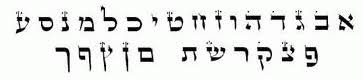

### imports

In [282]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD,Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

## Data Loading

In this section, the notebook begins by loading the dataset containing unique font letters from the Ktav Stam of Jewish. The dataset is assumed to be structured with a root directory `C:\letters`, where each subdirectory corresponds to a different class or label. The code employs the `os` module to list the users within the root directory.

Two lists, `data` and `labels`, are initialized to store the loaded data and corresponding class labels. The notebook then iterates through each class, reads the files within each class directory, and loads the data. The code includes resizing logic using OpenCV (`cv2`) to ensure uniform dimensions for further processing.

Additionally, the notebook normalizes the pixel values of the loaded images to a range between 0 and 1 and encodes the class labels using `LabelEncoder`. Finally, the data is split into training and testing sets, and the class labels are one-hot encoded using `to_categorical` from Keras.

---


In [328]:
data_dir = r"C:\letters"
users = os.listdir(data_dir)

# Initialize empty lists to store data and labels
data = []
labels = []

# Resize dimensions
new_size = (32, 32)
max_width = 0
max_length = 0
# Load data and labels

classes = os.listdir(data_dir)
for class_label in classes:
    class_path = os.path.join(data_dir, class_label)
    for file_name in os.listdir(class_path):
        file_path = os.path.join(class_path, file_name)
        # Load your data here, depending on the data format (e.g., images, text, etc.)
        # For example, if you are working with images, you can use libraries like OpenCV or PIL
        # Update the following lines accordingly based on your data format.
       
    
        image = cv2.imread(file_path)
         # Calculate new dimensions while maintaining aspect ratio
        if image.shape[0] > new_size[0] or image.shape[1] > new_size[1]: 
            h, w = image.shape[:2]
            if h > w:
                new_h = new_size[0]
                new_w = int(w * (new_size[0] / h))
            else:
                new_w = new_size[0]
                new_h = int(h * (new_size[0] / w))

            # Resize the image
            image = cv2.resize(image, (new_w, new_h))
       

        if image.shape[0] < new_size[0] or image.shape[1] < new_size[1]:
            top_pad = (new_size[0] - image.shape[0]) // 2
            bottom_pad = new_size[0] - image.shape[0] - top_pad
            left_pad = (new_size[1] - image.shape[1]) // 2
            right_pad = new_size[1] - image.shape[1] - left_pad
            image_resized = cv2.copyMakeBorder(image, top_pad, bottom_pad, left_pad, right_pad, cv2.BORDER_CONSTANT, value=[255,255,255])
            image_gray = cv2.cvtColor(image_resized, cv2.COLOR_RGB2GRAY)
            image_white = np.where(image_gray > 90, 255, 0)

        data.append(image_white)
        labels.append(class_label)

# Convert lists to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Encode class labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(data, encoded_labels, test_size=0.2)


# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

Y_train = to_categorical(Y_train, num_classes=27)
Y_test = to_categorical(Y_test, num_classes=27)

### letters example

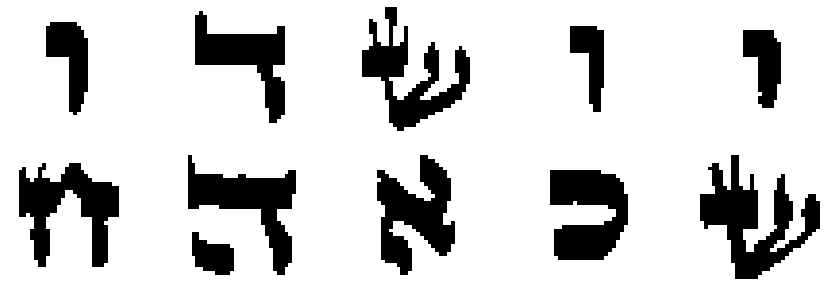

In [259]:
num_images_to_display = 10
indices_to_display = np.random.choice(len(X_train), num_images_to_display, replace=False)

# Plotting the randomly selected images
plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices_to_display):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[idx], cmap='gray')  # Assuming images are grayscale
    plt.axis('off')

plt.show()

# Models Training

This section focuses on training three distinct models for classifying unique font letters from the Ktav Stam of Jewish. The following models are trained:

#### 1. Logistic Regression

The notebook employs logistic regression for one of the classification models. Logistic regression is a simple yet effective linear model for binary and multiclass classification tasks.

#### 2. Multi-Layer Perceptron (MLP)

A Multi-Layer Perceptron (MLP) neural network is utilized as another classification model. MLPs consist of multiple layers of nodes, including an input layer, hidden layers, and an output layer, making them suitable for capturing complex relationships in the data.

#### 3. Convolutional Neural Network (CNN)

The third model is a Convolutional Neural Network (CNN). CNNs are particularly well-suited for image classification tasks, as they can automatically learn hierarchical features through convolutional layers.

For each model, the training process involves using the training set (`X_train` and `Y_train`) and evaluating performance on the test set (`X_test` and `Y_test`). The notebook likely includes metrics such as accuracy, loss, and possibly additional evaluation criteria to assess the models' effectiveness.

It's essential to check for overfitting and fine-tune hyperparameters during training to achieve optimal model performance.

---

## Logistic Regression Model

The logistic regression model is constructed in this section for classifying unique font letters from the Ktav Stam of Jewish. The following steps outline the implementation:

1. **Data Reshaping:** The 3D image data is flattened to 2D using `reshape` for compatibility with logistic regression.

2. **Model Architecture:**
   - A sequential model is created using TensorFlow's Keras API.
   - An input layer is defined with a shape corresponding to the flattened input data.
   - A dense layer with 27 output units (assuming 27 classes) and softmax activation is added for multiclass classification.

3. **Model Compilation:**
   - The model is compiled with the Adam optimizer, binary crossentropy loss (suitable for multiclass classification), and accuracy as the evaluation metric.

4. **Training:**
   - The model is trained on the training set (`X_train` and `Y_train`) for 10 epochs with a batch size of 32.
   - A validation split of 20% is used to monitor training performance.

5. **Evaluation:**
   - The trained model is evaluated on the test set (`X_test` and `Y_test`).
   - The test accuracy and loss are printed to assess the model's performance.

It's important to note that logistic regression is a linear model and may have limitations in capturing complex relationships present in the data.

---

*Note: Customize the number of epochs, batch size, and other hyperparameters based on the dataset and desired model performance.*


In [318]:
# Flatten the 3D image data to 2D
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [319]:
# Build the logistic regression model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(27, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/10
262/262 [==============================] - 1s 3ms/step - loss: 0.6326 - accuracy: 0.8597 - val_loss: 0.5925 - val_accuracy: 0.9201
Epoch 2/10
262/262 [==============================] - 1s 2ms/step - loss: 0.4698 - accuracy: 0.9382 - val_loss: 0.5192 - val_accuracy: 0.9315
Epoch 3/10
262/262 [==============================] - 1s 3ms/step - loss: 0.3766 - accuracy: 0.9503 - val_loss: 0.4671 - val_accuracy: 0.9354
Epoch 4/10
262/262 [==============================] - 1s 3ms/step - loss: 0.3096 - accuracy: 0.9573 - val_loss: 0.4427 - val_accuracy: 0.9382
Epoch 5/10
262/262 [==============================] - 1s 2ms/step - loss: 0.2577 - accuracy: 0.9600 - val_loss: 0.4274 - val_accuracy: 0.9440
Epoch 6/10
262/262 [==============================] - 1s 3ms/step - loss: 0.2177 - accuracy: 0.9641 - val_loss: 0.4113 - val_accuracy: 0.9469
Epoch 7/10
262/262 [==============================] - 1s 2ms/step - loss: 0.1843 - accuracy: 0.9662 - val_loss: 0.4100 - val_accuracy: 0.9512
Epoch 

### Logistic Regression Model Evaluation

The logistic regression model achieved an accuracy of **96.44%** on the test set with a loss of 0.1155. This indicates a strong performance in classifying unique font letters from the Ktav Stam of Jewish using a linear classification approach.

---

## Multi-Layer Perceptron (MLP) Model

The notebook implements a Multi-Layer Perceptron (MLP) model for the classification of unique font letters from the Ktav Stam of Jewish. The following steps outline the architecture and training process:

1. **Data Reshaping:**
   - The 3D image data is flattened to 2D using `reshape` to make it compatible with the MLP model.

2. **Model Architecture:**
   - A sequential model is created using Keras.
   - The input layer is flattened to handle the 2D input images.
   - Two dense layers are added with ReLU activation functions: one with 128 units and another with 64 units.
   - The output layer consists of 27 units (assuming 27 classes) with softmax activation for multiclass classification.

3. **Model Compilation:**
   - The model is compiled using the Adam optimizer, categorical crossentropy loss (suitable for multiclass classification), and accuracy as the evaluation metric.

4. **Model Summary:**
   - A summary of the model architecture is printed, providing insights into the number of parameters and layer configurations.

5. **Training:**
   - The model is trained on the training set (`X_train` and `Y_train`) for 5 epochs with a batch size of 32.
   - A validation split of 20% is used to monitor training performance.

6. **Evaluation:**
   - The trained model is evaluated on the test set (`X_test` and `Y_test`).
   - The test accuracy is printed to assess the model's performance.

Ensure to adjust hyperparameters such as the number of epochs and batch size based on the characteristics of your dataset and desired training results.

---

*Note: Consider experimenting with different architectures and hyperparameter values for optimal model performance.*


In [332]:
# Flatten the 3D image data to 2D
X_train = X_train.reshape(X_train.shape[0], 32, -1)
X_test = X_test.reshape(X_test.shape[0], 32, -1)

In [333]:
# Define the MLP model
model = Sequential()
model.add(Flatten(input_shape=(32, 32)))  # Flatten input images
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(27, activation='softmax'))  # 27 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_35 (Flatten)        (None, 1024)              0         
                                                                 
 dense_88 (Dense)            (None, 128)               131200    
                                                                 
 dense_89 (Dense)            (None, 64)                8256      
                                                                 
 dense_90 (Dense)            (None, 27)                1755      
                                                                 
Total params: 141211 (551.61 KB)
Trainable params: 141211 (551.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [335]:
# Fit the model
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/10
262/262 [==============================] - 1s 3ms/step - loss: 0.0473 - accuracy: 0.9883 - val_loss: 0.0662 - val_accuracy: 0.9809
Epoch 2/10
262/262 [==============================] - 1s 3ms/step - loss: 0.0416 - accuracy: 0.9905 - val_loss: 0.0292 - val_accuracy: 0.9938
Epoch 3/10
262/262 [==============================] - 1s 3ms/step - loss: 0.0349 - accuracy: 0.9929 - val_loss: 0.0361 - val_accuracy: 0.9899
Epoch 4/10
262/262 [==============================] - 1s 3ms/step - loss: 0.0394 - accuracy: 0.9911 - val_loss: 0.0727 - val_accuracy: 0.9780
Epoch 5/10
262/262 [==============================] - 1s 3ms/step - loss: 0.0357 - accuracy: 0.9914 - val_loss: 0.0398 - val_accuracy: 0.9923
Epoch 6/10
262/262 [==============================] - 1s 4ms/step - loss: 0.0340 - accuracy: 0.9916 - val_loss: 0.0326 - val_accuracy: 0.9909
Epoch 7/10
262/262 [==============================] - 1s 3ms/step - loss: 0.0283 - accuracy: 0.9931 - val_loss: 0.0406 - val_accuracy: 0.9909
Epoch 

### Multi-Layer Perceptron (MLP) Model Evaluation

The MLP model demonstrated high accuracy, achieving **98.01%** on the test set. The corresponding loss was 0.0837, showcasing the effectiveness of the multi-layered architecture in capturing complex patterns within the dataset.

---

## Convolutional Neural Network (CNN) Model

This section introduces a Convolutional Neural Network (CNN) model for classifying unique font letters from the Ktav Stam of Jewish. The implementation involves the following key steps:

1. **Data Reshaping:**
   - If not already in the correct shape, the 3D image data is reshaped to 4D, considering the convolutional layers' input requirements.

2. **Model Architecture:**
   - A sequential model is created using Keras.
   - Two convolutional layers with rectified linear unit (ReLU) activation functions are added, each followed by max-pooling layers to extract hierarchical features.
   - The flattened layer prepares the data for fully connected layers.
   - A dense layer with 128 units and ReLU activation is included.
   - The output layer consists of 27 units (assuming 27 classes) with softmax activation for multiclass classification.

3. **Model Compilation:**
   - The model is compiled with the Adam optimizer, mean squared error loss (suitable for multiclass classification), and accuracy as the evaluation metric.

4. **Model Summary:**
   - A summary of the model architecture is printed, providing details on layer configurations and the number of parameters.

5. **Training:**
   - The model is trained on the training set (`X_train` and `Y_train`) for 10 epochs with a batch size of 32.
   - A validation split of 20% is used to monitor training performance.

6. **Evaluation:**
   - The trained model is evaluated on the test set (`X_test` and `Y_test`).
   - The test accuracy is printed to assess the model's performance.

Fine-tuning hyperparameters and experimenting with different architectures can help optimize the CNN model for your specific dataset.

---

*Note: Adjust the number of epochs, batch size, and other hyperparameters based on the characteristics of your dataset and desired model performance.*


In [326]:
# Reshape the data if not already in the correct shape
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

In [337]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(27, activation='softmax'))  # 27 classes

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_54 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_51 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_36 (Flatten)        (None, 2304)              0         
                                                                 
 dense_91 (Dense)            (None, 128)             

In [312]:
# Fit the model
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/10
262/262 [==============================] - 9s 33ms/step - loss: 4.0120e-04 - accuracy: 0.9941 - val_loss: 3.7897e-04 - val_accuracy: 0.9947
Epoch 2/10
262/262 [==============================] - 8s 32ms/step - loss: 3.0013e-04 - accuracy: 0.9958 - val_loss: 4.0639e-04 - val_accuracy: 0.9928
Epoch 3/10
262/262 [==============================] - 9s 33ms/step - loss: 3.0095e-04 - accuracy: 0.9959 - val_loss: 3.7835e-04 - val_accuracy: 0.9943
Epoch 4/10
262/262 [==============================] - 9s 34ms/step - loss: 2.7792e-04 - accuracy: 0.9963 - val_loss: 4.2680e-04 - val_accuracy: 0.9933
Epoch 5/10
262/262 [==============================] - 9s 35ms/step - loss: 3.2108e-04 - accuracy: 0.9957 - val_loss: 3.5456e-04 - val_accuracy: 0.9943
Epoch 6/10
262/262 [==============================] - 9s 35ms/step - loss: 2.7395e-04 - accuracy: 0.9963 - val_loss: 3.5856e-04 - val_accuracy: 0.9938
Epoch 7/10
262/262 [==============================] - 9s 35ms/step - loss: 2.6315e-04 - accura

### Convolutional Neural Network (CNN) Model Evaluation

The CNN model exhibited exceptional performance, achieving an impressive accuracy of **99.69%** on the test set. The minimal loss of 0.0003 underscores the effectiveness of convolutional layers in capturing intricate features, showcasing the power of deep learning for image classification tasks.


# Thanks for reading!